In [1]:
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pymp
num_thread = 1

from numba import jit
from timeit import default_timer as timer
from matplotlib import rc
rc('text', usetex=True)

In [6]:
w=np.loadtxt("./ML_data/w_kernel_mean.txt")
file_dir = "fix_mu_T"
f = open('LJ_data_'+file_dir+'/MC_parameter.dat', 'r')
temp = f.read().split("\t")
L=float(temp[0])
dx=float(temp[1])
N=int(L/dx)
batch_size = int(temp[2])
f.close()
temp 
LLw = int(8/dx)/2
Lw = LLw*2+1


In [7]:
def ULJ(x):
    #if(abs(x)<2**(1.0/6)):
    #    return -0.5
    return 4*(1.0/x**12-1.0/x**6)/2

def Utail(x):
    if(abs(x)<2**(1.0/6)):
        return -0.5
    return 4*(1.0/x**12-1.0/x**6)/2

In [8]:
gold=1.618

/home/sam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


([<matplotlib.axis.YTick at 0x7f3c99819ac8>,
 <a list of 4 Text yticklabel objects>)

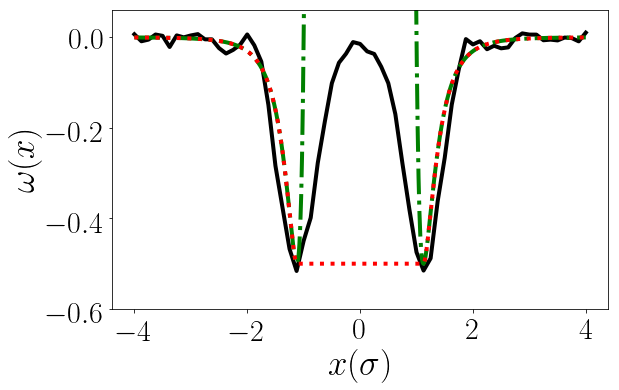

In [9]:
plt.figure(figsize=(5.5*gold,5.5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


x = np.linspace(-LLw,LLw,Lw)*dx
x2 = np.linspace(-LLw,LLw,1024)*dx
#plt.title("w")
tail = np.zeros(len(x2))
LJ =  np.zeros(len(x2))
for i in range(len(x2)):
    tail[i]=Utail(x2[i])
    LJ[i]=ULJ(x2[i])
    

plt.plot(x,w,"k-",linewidth=4)    
plt.plot(x2,LJ,"g-.",linewidth=4)
plt.plot(x2,tail,"r:",linewidth=4)

plt.ylabel("$\omega(x)$",size=35)
plt.xlabel("$x(\sigma$)",size=35)
#plt.legend() 
plt.ylim(min(w-0.05),max(w+0.05))
plt.xticks(np.arange(min(x), max(x)+1, 2.0),fontsize=30)
plt.yticks(np.arange(-0.6, 0.2, 0.2),fontsize=30)
#plt.savefig("ML_figure/w_mean.eps",format="eps", bbox_inches='tight')